In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1588476374938_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sb

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
df = spark.read.json('s3://sayerspyspark/*business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
print(f'Columns: {len(df.columns)} | Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209,393

In [5]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

'Display the first 5 rows with the following columns:'
"*business_id\n",
    "\n",
    "*name\n",
    "\n",
    "*city\n",
    "\n",
    "*state\n",
    "\n",
    "*categories"


In [6]:
df.select("business_id","name","city","state","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

In [7]:
from pyspark.sql.functions import *

x1 = df.select(col("business_id"), explode(split(col("categories"), ",")).alias('categories'))
x1=x1.withColumn('categories', ltrim(x1.categories))
x1.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|      categories|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

In [8]:
x1.select("categories").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

In [11]:
x1.select('categories').groupby(x1.categories).count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|         categories|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|       Aerial Tours|   28|
|      Skating Rinks|  104|
|  Signature Cuisine|    1|
|             Fondue|   54|
|      Data Recovery|  195|
|  Pet Waste Removal|   34|
|      Videographers|  169|
|    Pet Photography|   49|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

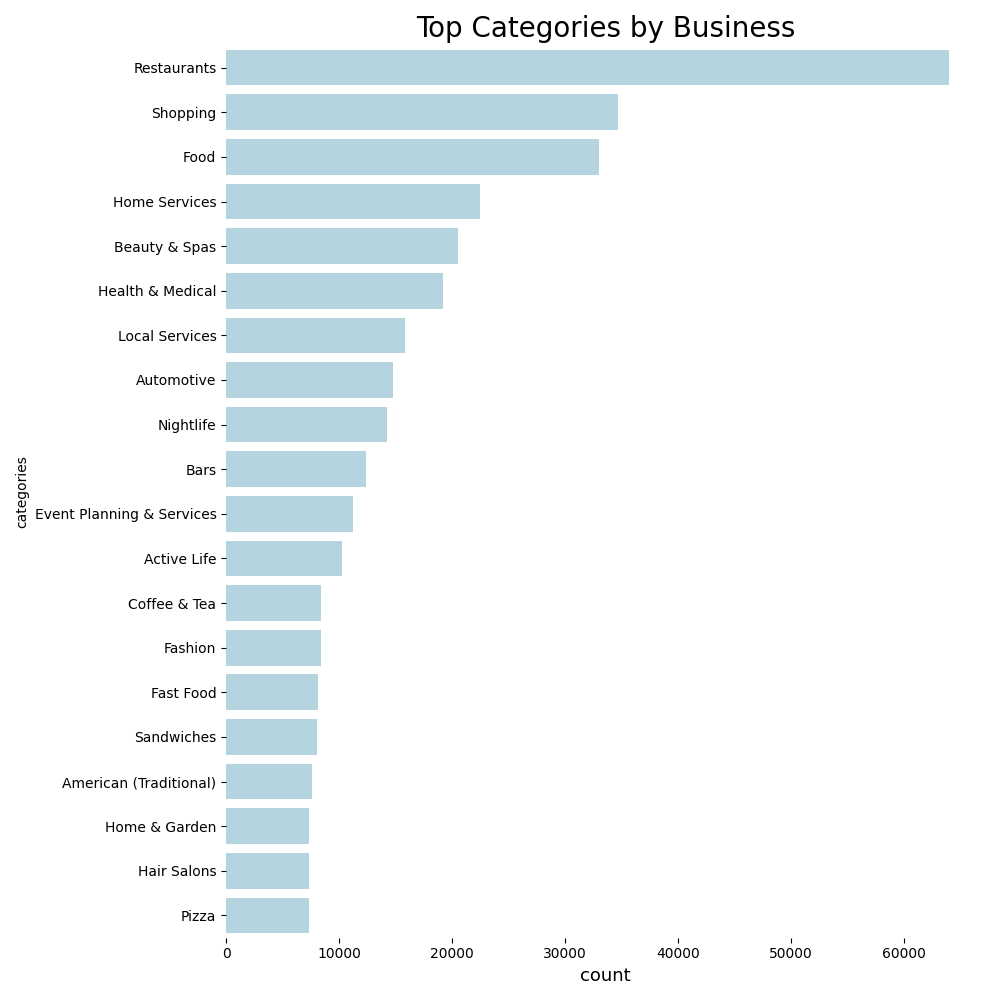

In [12]:
zx = x1.select('categories').groupby(x1.categories).count().sort(desc("count")).limit(20).toPandas()

plt.clf()
plt.figure(figsize=(10,10))
plt.title('Top Categories by Business', fontsize=20)
#plt.yticks(fontsize=12)
#plt.xticks(fontsize=12)
plt.xlabel('',fontsize=13)
plt.xlabel('category',fontsize=13)
plt.box(False)
plt.gca().invert_yaxis()
sb.barplot(zx['count'],zx['categories'],color="lightblue")
plt.tight_layout()
%matplot plt

In [13]:
udf = spark.read.json('s3://sayerspyspark/*review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
udf.printSchema()
#print(f'Columns: {len(udf.columns)} | Rows: {udf.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [15]:
udf.select("business_id","stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [16]:
from pyspark.sql.functions import col, avg
udx = udf.where(col("text").isNotNull()).groupby(udf.business_id).agg(avg(col("stars")))
udx.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

In [17]:
from pyspark.sql.functions import desc

udy = udf.groupby(udf.business_id).agg(avg(col("stars")))
new_df = df.join(udx, on=['business_id'])
new_df2= df.join(udy,on=['business_id'])
#new_df = new_df.select("avg(stars)","stars","name","city","state").sort(desc("""avg(stars)"""))
#new_df2 = new_df2.select("avg(stars)","stars","name","city","state").sort(desc("""avg(stars)"""))
new_df.select("""avg(stars)""","stars","name","city","state").sort(desc("""avg(stars)""")).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+----------+-----+
|avg(stars)|stars|                name|      city|state|
+----------+-----+--------------------+----------+-----+
|       5.0|  5.0|          Mane.edits| Charlotte|   NC|
|       5.0|  5.0|      Thomas S Holly|   Phoenix|   AZ|
|       5.0|  5.0|       The Amburgeys|   Gilbert|   AZ|
|       5.0|  5.0|Jane Bloch - Cold...|Pittsburgh|   PA|
|       5.0|  5.0| Arizona Microgreens|   Phoenix|   AZ|
+----------+-----+--------------------+----------+-----+
only showing top 5 rows

In [18]:
x = new_df.select("avg(stars)","stars","name","city","state").sort("""avg(stars)""",ascending=False)
y =   new_df2.select("avg(stars)","stars","name","city","state").sort("""avg(stars)""",ascending=False)
new_dfx = x.withColumn("skew", ((x["""avg(stars)"""]-y["stars"])/x["stars"])).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

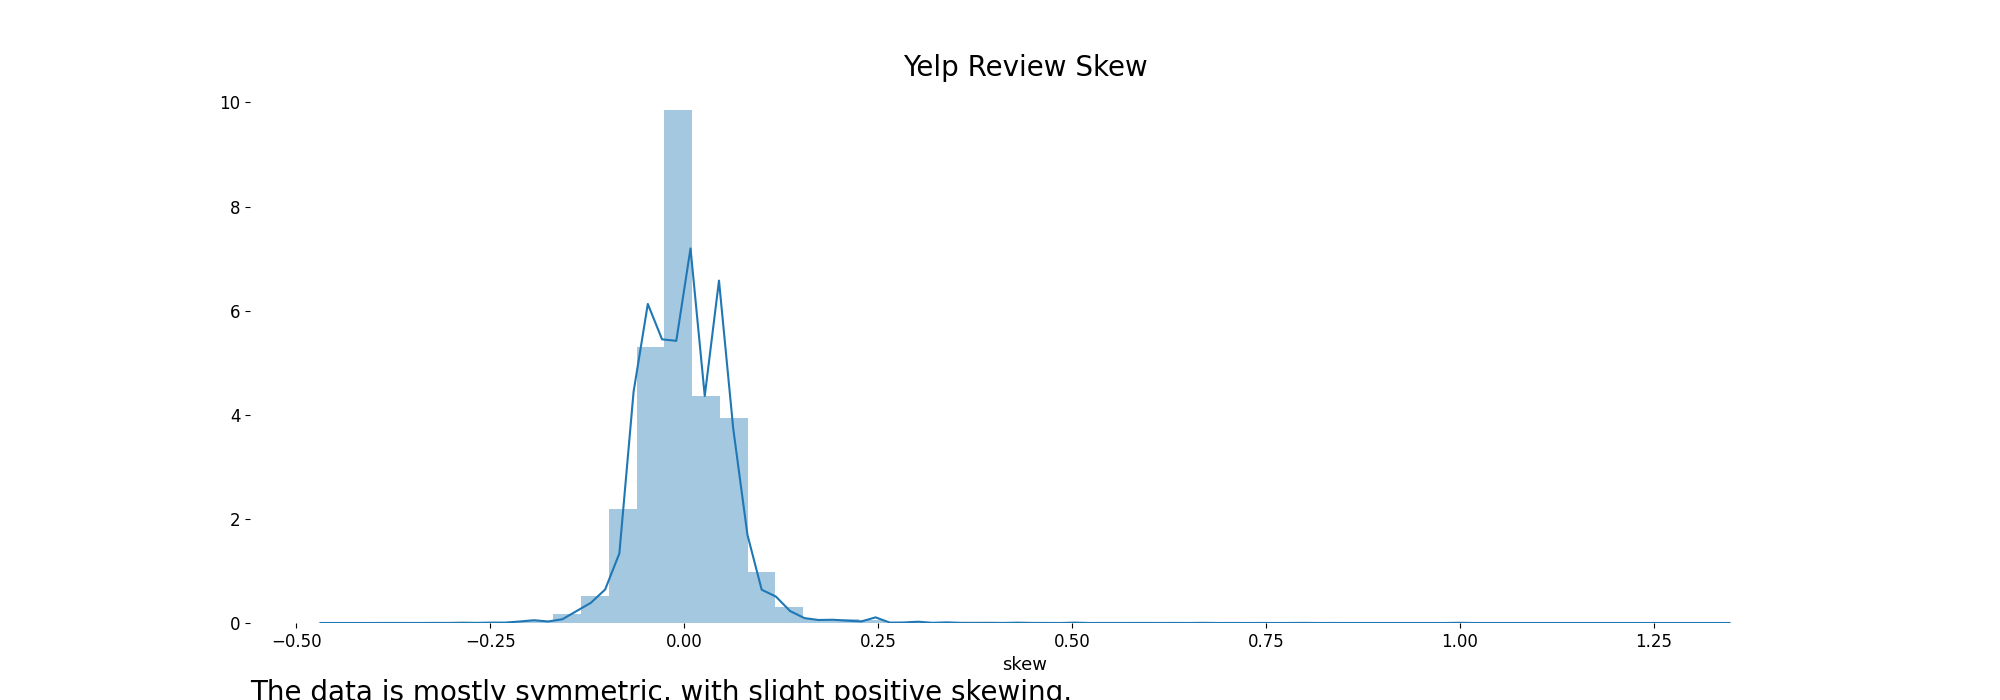

In [28]:
plt.clf()
plt.figure(figsize=(20,7))
plt.title('Yelp Review Skew', fontsize=20)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('',fontsize=13)
plt.box(False)
hist_kws=dict(alpha=0.2)
sb.distplot(new_dfx["skew"])
plt.annotate("The data is mostly symmetric, with slight positive skewing.",(0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top',fontsize=20)
%matplot plt

In [29]:
print("Symmetric data with slightly more data on the left and a longer right tail suggests very slight skewing.  This means there is an insignificant positive skew, suggesting that a small number of people rate positively without ever leaving a review.")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Symmetric data with slightly more data on the left and a longer right tail suggests very slight skewing.  This means there is an insignificant positive skew, suggesting that a small number of people rate positively without ever leaving a review.

In [21]:
users = spark.read.json('s3://sayerspyspark/*user.json')
reviews= spark.read.json('s3://sayerspyspark/*review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
userselite = users.select(col("user_id"), explode(split(col("elite"), ",")).alias('elite_yrs'))
userselitecnt = userselite.groupby(userselite.user_id).agg(count(col("elite_yrs")).alias("yrs_elite"))
userselitecnt = userselitecnt.withColumn("yrs_elite", userselitecnt['yrs_elite']-1)
avgreview  = reviews.groupby(col("user_id")).agg(avg("stars").alias("avg_stars"))
revcount = reviews.groupby("user_id","stars").agg(count("stars").alias("rev_count"))
revmax = revcount.groupby("user_id").agg(max("rev_count").alias("rev_count"))
revmode = revmax.join(revcount, on=["user_id","rev_count"])
#mode = revcount.join(
#    revcount.agg(max("rev_count").alias("max_")), col("rev_count") == col("max_")
#).select("user_id","stars")
revmode = revmode.withColumnRenamed("stars","stars2")
elitetrust = userselitecnt.join(avgreview, on="user_id").toPandas()
elitemode = userselitecnt.join(revmode, on="user_id").groupby('yrs_elite','stars2').agg(count("stars2")).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
print("First, I'm going to evaluate whether Elite Ratings tend to be higher. In this portion of the analysis, I'll be reviewing average rating for each user as well as calculating the years they spent as an Elite. If there is a relationship between rating habits and Elite status, I expect to see clear trending in average scores by years spent as Elite.")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

First, I'm going to evaluate whether Elite Ratings tend to be higher. In this portion of the analysis, I'll be reviewing average rating for each user as well as calculating the years they spent as an Elite. If there is a relationship between rating habits and Elite status, I expect to see clear trending in average scores by years spent as Elite.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

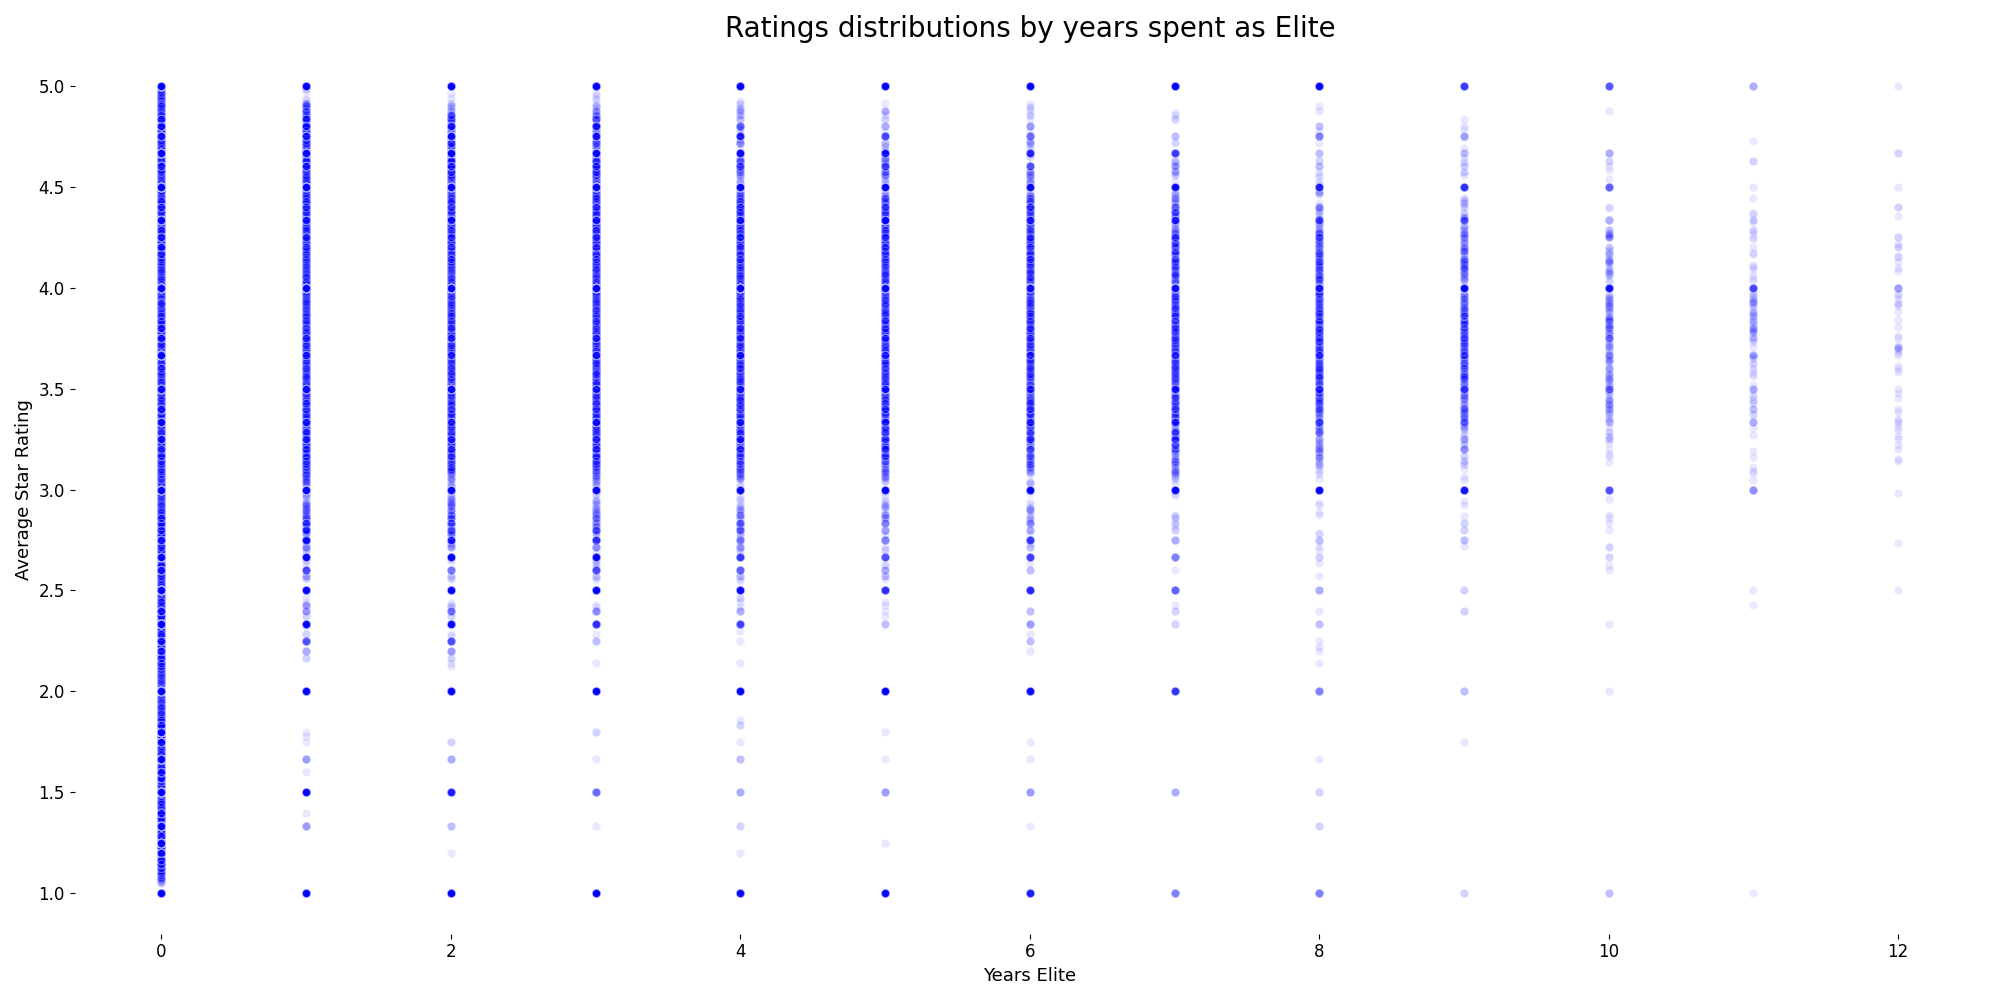

In [27]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title('Ratings distributions by years spent as Elite', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.box(False)
#sb.scatterplot(elitemode['yrs_elite'],elitemode['stars2'],color="red")
sb.scatterplot(elitetrust['yrs_elite'],elitetrust['avg_stars'],alpha=0.09, color="blue")
plt.xlabel("Years Elite",fontsize=13)
plt.ylabel("Average Star Rating", fontsize = 13)
plt.tight_layout()
%matplot plt



In [31]:
print("The higher the number of years a given user has spent as an Elite, the higher their average rating is. This suggests not only that Elites are more likely to give good reviews but also may indicate that people that give good reviews may be more likely to be chosen as Elites. Comparatively, the distribution of the average scores of users who ahve never been Elite runs the full gamut.")

print("Next, we'll secure this partial conclusion by looking at the mode per user per rating. Averages can be skewed by extremes on either end of a sdistribution if it has upper or lower bounds, which our data does, so examining the mode will give additional data to tell whether the averages are merely a quirk of the data or represent real-world behavioral patterns.")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The higher the number of years a given user has spent as an Elite, the higher their average rating is. This suggests not only that Elites are more likely to give good reviews but also may indicate that people that give good reviews may be more likely to be chosen as Elites. Comparatively, the distribution of the average scores of users who ahve never been Elite runs the full gamut.
Next, we'll secure this partial conclusion by looking at the mode per user per rating. Averages can be skewed by extremes on either end of a sdistribution if it has upper or lower bounds, which our data does, so examining the mode will give additional data to tell whether the averages are merely a quirk of the data or represent real-world behavioral patterns.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

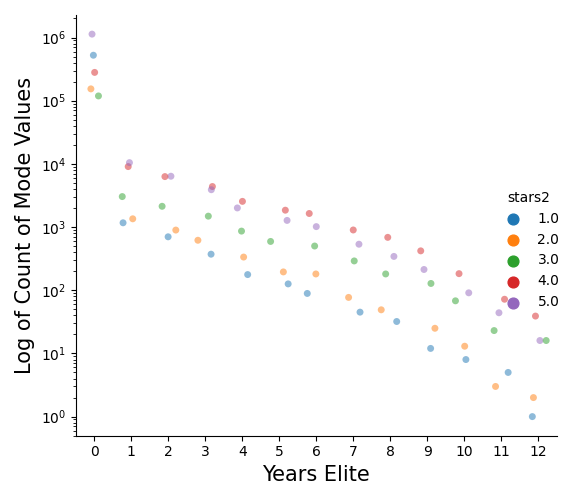

In [32]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title('Probability of a given score being the mode per year spent as an Elite', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)



plt.box(False)
#sb.barplot(elitemode,color="red")
g = sb.catplot(x = 'yrs_elite',y="""count(stars2)""",data=elitemode,kind="strip",alpha=0.5, hue="stars2",jitter=0.25)
plt.yscale('log')
#plt.hist(elitemode)
plt.ylabel("Log of Count of Mode Values",fontsize=15)
plt.xlabel("Years Elite",fontsize=15)
#legend = g.legend
#legend.set_title("Sex")
#legend = plt.legend(handles=[1, 2, 3,4,5], title="title",loc=4, fontsize='small', fancybox=True)
plt.tight_layout()
%matplot plt

In [31]:
print("The frequency distribution of the mode of a given Elite's ratings has a much larger and more distinct spread than non-elites, with higher ratings being the norm more often, the more years someone has been an Elite. This suggests potentially that this behavior is incentivized or else its converse is punished, possibly through revocation of that status.")

print("Finally, we'll look at ")

#define a new column for reviews that chops everything but the year off of the review date. Then groupby user id, year, and business_id, then filter where user_id and year appears in elite table where years elite is 1 or more (or not null)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The frequency distribution of the mode of a given Elite's ratings has a much larger and more distinct spread than non-elites, with higher ratings being the norm more often, the more years someone has been an Elite. This suggests potentially that this behavior is incentivized or else its converse is punished, possibly through revocation of that status.